In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Get Dataset


In [2]:
import os
import pandas as pd
import random
import numpy as np

# Lists (same as before, shortened here for readability)
names = ["Aarav", "Vivaan", "Aditya", "Vihaan", "Arjun",
         "Sai", "Reyansh", "Krishna", "Ishaan", "Kabir",
         "Anaya", "Diya", "Myra", "Aadhya", "Pari", 
         "Saanvi", "Anika", "Navya", "Aarohi", "Ira"]

locations = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai", 
             "Kolkata", "Pune", "Ahmedabad", "Jaipur", "Lucknow",
             "Indore", "Bhopal", "Nagpur", "Surat", "Chandigarh", 
             "Goa", "Guwahati", "Kochi", "Patna", "Ranchi"]

interests = ["Hip-Hop", "Bollywood", "Dance", "Rap Battles", "Freestyle", 
             "Graffiti", "Street Dance", "Poetry", "DJ Nights", "Open Mic", 
             "Music Production", "Beatboxing", "Concerts", "Gigs", "Art", 
             "Coding", "Football", "Cricket", "Basketball", "Skating",
             "Book Shopping", "Traveling"]

artists = ["DIVINE", "MC Stan", "Seedhe Maut", "KR$NA", "Raftaar", 
           "Ikka", "Brodha V", "Prabh Deep", "Fotty Seven", "Badshah", 
           "King", "Karma", "Arijit Singh", "Karan Aujla", "Masala Coffee", 
           "Bloodywood", "Emiway Bantai", "Naezy", "Talha Anjum", "Talha Yunus",
           "Sidhu Moosewala", "Dino James", "Jubin Nautiyal", "Shreya Ghoshal"]

personalities = ["Extrovert", "Introvert", "Ambivert", "Optimist", "Realist",
                 "Dreamer", "Leader", "Chill", "Adventurous", "Calm",
                 "Creative", "Analytical", "Empathetic", "Funny",
                 "Serious", "Curious", "Spontaneous", "Practical", "Bold", "Kind"]

event_types = ["Concert", "Rap Battle", "Music Festival", "Open Mic", "DJ Night", 
               "Street Dance Battle", "Graffiti Jam", "Poetry Slam", "Workshop", 
               "Album Launch", "Listening Party", "Stand-up", "Dance Jam", 
               "Indie Night","Collab Event", "Cypher Meet", "Music Tech Fest", 
               "Producer Showcase", "Beatbox Battle", "Afterparty"]

availability_options = ["Weekdays", "Weekends", "Evenings", "Flexible"]

# Helper function: randomly insert NaN with 15% chance
def maybe_nan(value, prob=0.15):
    return value if random.random() > prob else np.nan

# Generate 100 synthetic user profiles
random.seed(42)
data = []
for i in range(1, 101):
    record = {
        "user_id": i,
        "name": maybe_nan(random.choice(names)),
        "age": maybe_nan(random.randint(18, 35)),
        "gender": maybe_nan(random.choice(["Male", "Female"])),
        "location": maybe_nan(random.choice(locations)),
        "interests": maybe_nan(random.choice(interests)),
        "favorite_artist": maybe_nan(random.choice(artists)),
        "personality": maybe_nan(random.choice(personalities)),
        "availability": maybe_nan(random.choice(availability_options)),
        "event_type": maybe_nan(random.choice(event_types))
    }
    data.append(record)

df = pd.DataFrame(data)

# Save CSV into current working directory
file_path = os.path.join(os.getcwd(), "matchmaking_dataset_with_missing.csv")
df.to_csv(file_path, index=False)

print("Dataset saved at:", file_path)
print(df.head(10))  # preview first 10 rows


Dataset saved at: c:\Users\abhin\OneDrive\Documents\MY Coding Space\Learning Topics\New folder\MatchMakingApp\matchmaking_dataset_with_missing.csv
   user_id    name   age  gender   location      interests favorite_artist  \
0        1     NaN  26.0    Male        NaN            NaN     Seedhe Maut   
1        2    Pari  18.0    Male     Indore   Street Dance             NaN   
2        3     NaN   NaN  Female     Ranchi     Beatboxing             NaN   
3        4    Pari  29.0  Female     Jaipur      Traveling     Talha Yunus   
4        5   Navya  28.0    Male      Delhi       Concerts        Brodha V   
5        6     NaN  22.0  Female      Surat       Concerts         Raftaar   
6        7  Aadhya  30.0  Female      Kochi        Hip-Hop           KR$NA   
7        8   Aarav  26.0    Male  Hyderabad       Open Mic   Emiway Bantai   
8        9     Ira   NaN  Female    Lucknow         Poetry             NaN   
9       10     Sai  31.0    Male     Nagpur  Book Shopping   Emiway Banta

In [3]:
df.head(10)

,user_id,name,age,gender,location,interests,favorite_artist,personality,availability,event_type
0,1,NaN,26.0,Male,NaN,NaN,Seedhe Maut,Spontaneous,Weekends,Producer Showcase
1,2,Pari,18.0,Male,Indore,Street Dance,NaN,NaN,Evenings,Rap Battle
2,3,NaN,NaN,Female,Ranchi,Beatboxing,NaN,Chill,Weekdays,Open Mic
3,4,Pari,29.0,Female,Jaipur,Traveling,Talha Yunus,Practical,Weekends,Workshop
4,5,Navya,28.0,Male,Delhi,Concerts,Brodha V,Bold,Evenings,Cypher Meet
5,6,NaN,22.0,Female,Surat,Concerts,Raftaar,Ambivert,Weekdays,Street Dance Battle
6,7,Aadhya,30.0,Female,Kochi,Hip-Hop,KR$NA,Practical,NaN,Indie Night
7,8,Aarav,26.0,Male,Hyderabad,Open Mic,Emiway Bantai,Realist,Weekends,Music Tech Fest
8,9,Ira,NaN,Female,Lucknow,Poetry,NaN,Curious,NaN,Cypher Meet
9,10,Sai,31.0,Male,Nagpur,Book Shopping,Emiway Bantai,Chill,NaN,Producer Showcase


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,50.500000,29.011492,1.0,25.75,50.5,75.25,100.0
age,85.0,26.870588,5.331372,18.0,22.00,28.0,32.00,35.0


In [5]:
df.isna().sum()

user_id             0
name               14
age                15
gender             13
location           17
interests          16
favorite_artist    22
personality        14
availability       11
event_type          6
dtype: int64

In [6]:
df.head()

,user_id,name,age,gender,location,interests,favorite_artist,personality,availability,event_type
0,1,NaN,26.0,Male,NaN,NaN,Seedhe Maut,Spontaneous,Weekends,Producer Showcase
1,2,Pari,18.0,Male,Indore,Street Dance,NaN,NaN,Evenings,Rap Battle
2,3,NaN,NaN,Female,Ranchi,Beatboxing,NaN,Chill,Weekdays,Open Mic
3,4,Pari,29.0,Female,Jaipur,Traveling,Talha Yunus,Practical,Weekends,Workshop
4,5,Navya,28.0,Male,Delhi,Concerts,Brodha V,Bold,Evenings,Cypher Meet


In [7]:
df['age'].fillna(df['age'].median(), inplace=True)
df['name'].fillna('Name',inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['location'].fillna(df['location'].mode()[0],inplace=True)
df['interests'].fillna('Sleeping',inplace=True)
df['favorite_artist'].fillna('Anuv Jain',inplace=True)
df['personality'].fillna('Macheiavilist',inplace=True)
df['availability'].fillna('Not Available',inplace=True)
df['event_type'].fillna('Hangout/ meet',inplace=True)


In [8]:
df.isna().sum()

user_id            0
name               0
age                0
gender             0
location           0
interests          0
favorite_artist    0
personality        0
availability       0
event_type         0
dtype: int64

In [9]:
df.head(10)

,user_id,name,age,gender,location,interests,favorite_artist,personality,availability,event_type
0,1,Name,26.0,Male,Delhi,Sleeping,Seedhe Maut,Spontaneous,Weekends,Producer Showcase
1,2,Pari,18.0,Male,Indore,Street Dance,Anuv Jain,Macheiavilist,Evenings,Rap Battle
2,3,Name,28.0,Female,Ranchi,Beatboxing,Anuv Jain,Chill,Weekdays,Open Mic
3,4,Pari,29.0,Female,Jaipur,Traveling,Talha Yunus,Practical,Weekends,Workshop
4,5,Navya,28.0,Male,Delhi,Concerts,Brodha V,Bold,Evenings,Cypher Meet
5,6,Name,22.0,Female,Surat,Concerts,Raftaar,Ambivert,Weekdays,Street Dance Battle
6,7,Aadhya,30.0,Female,Kochi,Hip-Hop,KR$NA,Practical,Not Available,Indie Night
7,8,Aarav,26.0,Male,Hyderabad,Open Mic,Emiway Bantai,Realist,Weekends,Music Tech Fest
8,9,Ira,28.0,Female,Lucknow,Poetry,Anuv Jain,Curious,Not Available,Cypher Meet
9,10,Sai,31.0,Male,Nagpur,Book Shopping,Emiway Bantai,Chill,Not Available,Producer Showcase


In [10]:
gender_counts=df['gender'].value_counts()
gender_counts

gender
Female    60
Male      40
Name: count, dtype: int64

<Axes: xlabel='gender'>

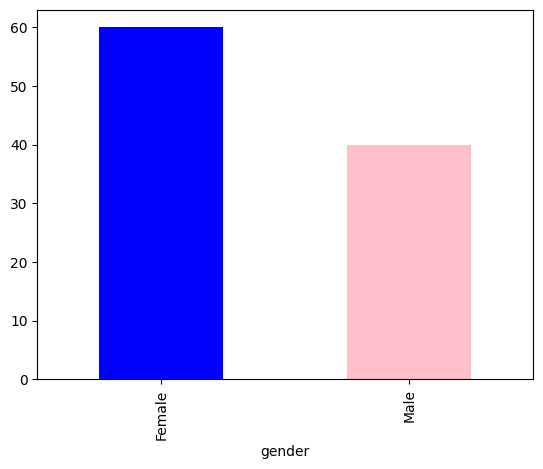

In [ ]:
gender_counts.plot(kind='bar',color=['blue','pink'])

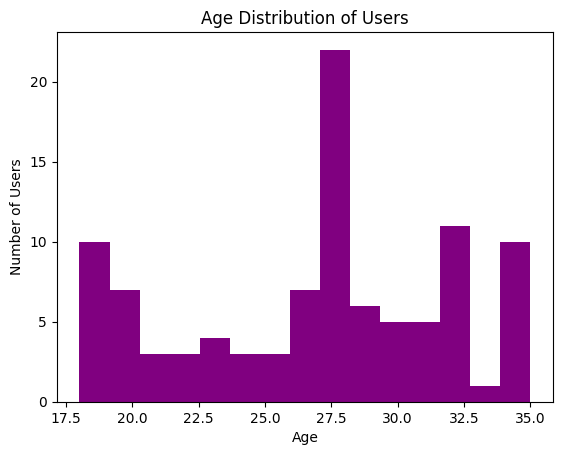

In [13]:
df['age'].plot(kind='hist',bins=15,color='purple')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution of Users')
plt.show()

In [14]:
df.columns

Index(['user_id', 'name', 'age', 'gender', 'location', 'interests',
       'favorite_artist', 'personality', 'availability', 'event_type'],
      dtype='object')

<Axes: xlabel='interests'>

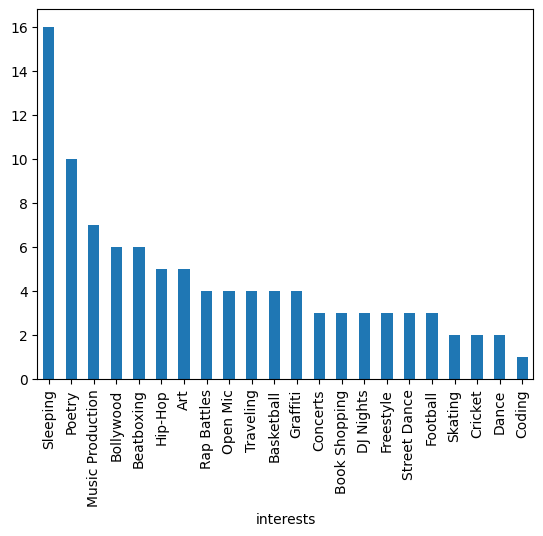

In [16]:
interest_count = df['interests'].value_counts()
interest_count.plot(kind='bar')

<Axes: xlabel='event_type'>

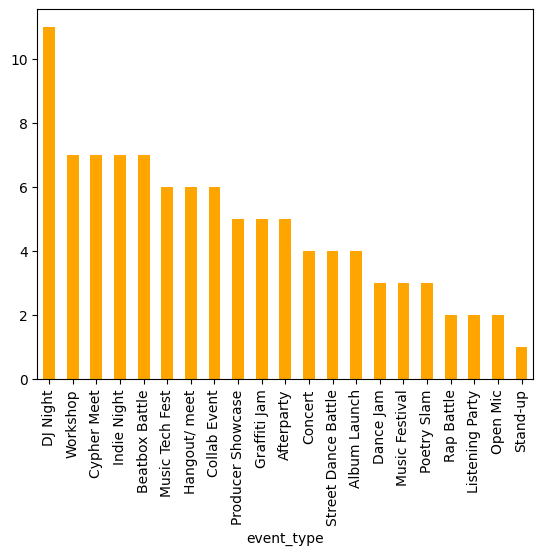

In [17]:
events = df['event_type'].value_counts()
events.plot(kind='bar',color='orange')



In [19]:
events_corr = events.corr(interest_count)
events_corr

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


nan